## Rosenblatt’s Perceptron  


<div>
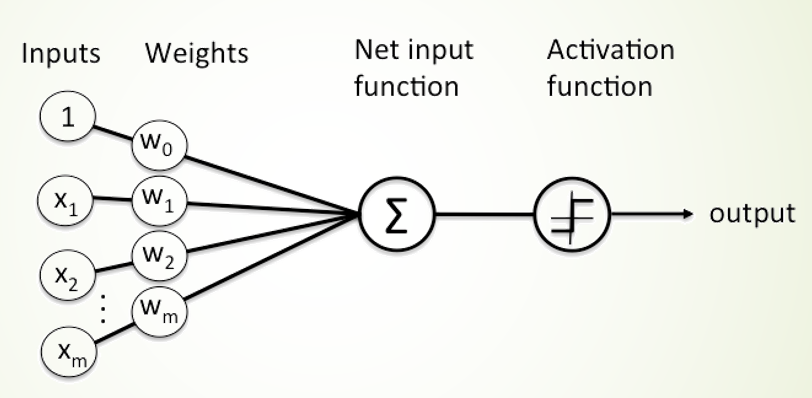
</div>

&nbsp;Supervised learning  
&nbsp;Single-layer  
&nbsp;Binary linear classifier

### Initialize the weights to 0 or small random numbers

<div>
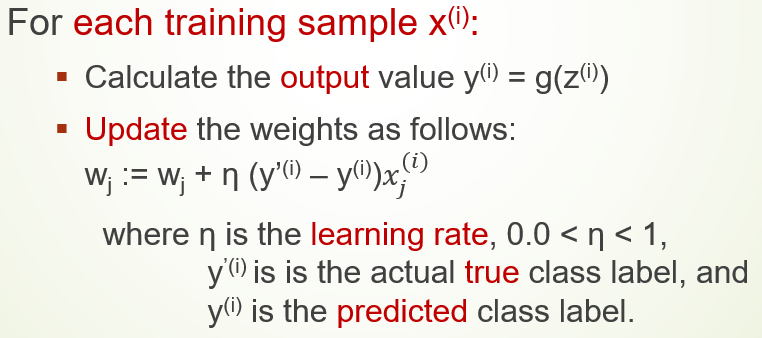
</div>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [16]:
# 感知器
class Perceptron(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta #權重
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.epochs): # _ 僅用作 控制循環次數
            errors = 0
            for xi, target in zip(X, y): # 對應每一列的 屬性值、標籤
                update = self.eta * (target - self.predict(xi)) 
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # 內積（屬性值，對應權重）＋ 偏移權重

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) # 1 if > 0 else -1

In [34]:
df = pd.read_csv('iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
# 前 100項 - setosa and versicolor 
# labeling setosa(-1) versicolor(1) 
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

In [71]:
ppn.train(X, y)

Weights: [-0.4  -0.68  1.82]


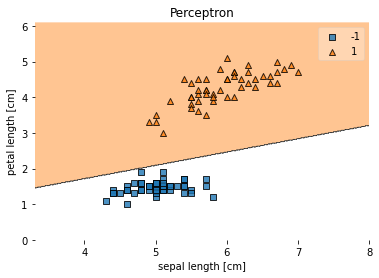

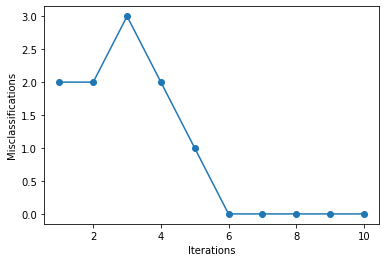

In [69]:
ppn = Perceptron(epochs=10, eta=0.1)
ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()
